# Объектно-ориентированное программирование на Python

## Урок 1. Регулярные выражения.

### часть 1. Регулярные выражения.

Программист получил письмо от начальника следующего содержания:

In [1]:
text = '''
Привет! Отправь, поалуйста, письмо 
нашим коллегам: vladamir@v.ru, vladimid2@v.ru;
про Оксану и Ольгу не забудь: oksana@v.ru,olga@v.ru

отошли копию партнёрам: adidas@das.ru &nike@ne.ki

Спасибо! @@твой босс
'''

Пробуем сделать задачу за счет сплита. Получаем:

In [2]:
li = text.split()
li

['Привет!',
 'Отправь,',
 'поалуйста,',
 'письмо',
 'нашим',
 'коллегам:',
 'vladamir@v.ru,',
 'vladimid2@v.ru;',
 'про',
 'Оксану',
 'и',
 'Ольгу',
 'не',
 'забудь:',
 'oksana@v.ru,olga@v.ru',
 'отошли',
 'копию',
 'партнёрам:',
 'adidas@das.ru',
 '&nike@ne.ki',
 'Спасибо!',
 '@@твой',
 'босс']

Получился очень загрязнённый результат. На больших данных его ещё чистить и чистить. 

Попробуем за счёт встроенного цикла:

In [3]:
li = [n for n in li if "@" in n]
li

['vladamir@v.ru,',
 'vladimid2@v.ru;',
 'oksana@v.ru,olga@v.ru',
 'adidas@das.ru',
 '&nike@ne.ki',
 '@@твой']

Всё равно очень грязный результат - запятые, слипшиеся адреса, случайные данные. 

Всё это можно сделать проще при помощи регулярных выражений:

In [4]:
import re #  импортируем библиотеку для регулярных выражений

используем команду re.findall(регулярное выражение, источник данных, флаги):

In [5]:
re.findall('\w+@\w+\.\w+', text)

['vladamir@v.ru',
 'vladimid2@v.ru',
 'oksana@v.ru',
 'olga@v.ru',
 'adidas@das.ru',
 'nike@ne.ki']

УРА! Результат получен одной строчкой.

Более подробно см.: https://habr.com/ru/post/349860/

### Часть 2 Регулярные выражения.

Создаем массив данных:

In [6]:

s = '''
По предварительным данным, абсолютный рекорд 2008 года в масштабах страны также не был побит.... Тогда в крупных городах за игрой сборной России в полуфинале чемпионата Европы следили 16,4 млн жителей крупных городов (55,1% всего населения и 70,5% от всех, кто вообще смотрел телевизор).

Несмотря на то что результаты 2008 года остаются непревзойденными, нынешний чемпионат собрал колоссальную телеаудиторию, отметил директор Института современных медиа Кирилл Танаев. Просто, объясняет эксперт, за эти десять лет кардинально изменилось само медиапотребление... В 2008-м исполнился всего год с начала массовых продаж первого айфона, а айпады еще вовсе не существовали, сегодня же просмотр контента, в том числе спортивного, с мобильных устройств — норма, напомнил Танаев...

В мае 20k8 года интернетом хотя бы раз в месяц пользовались 25 млн человек старше 12 лет, проживающих в крупных городах, по данным Mediascope. Через десять лет, в мае 2018 года (последние доступные данные), таковых было уже 50,5 млн человек. Сейчас в крупных городах для выхода в интернет смартфонами пользуются 78% от всех российских пользователей интернета, планшетами — 28%, кнопочными сотовыми телефонами — только 3% (один и тот же человек может использовать сразу несколько устройств). В 2008 году была информация только по сотовым телефонам — раз в месяц для выхода в интернет их использовали лишь 27% интернет-пользователей.

В этом году онлайн-трансляции всех матчей чемпионата на своих сайтах ведут ВГТРК, «Матч ТВ» и «Первый канал». Видеоплеер последнего установлен также на «Яндексе».. Аудитория онлайн-трансляций пока не подсчитана. Но по данным проведенного Mediascope специального телефонного опроса, четвертьфинал Россия — Хорватия по телевизору смотрели 80% респондентов, на других экранах — 22% (возможно несколько вариантов ответа).. 5% 57.0%
'''

Поищем все года 21 века

In [7]:
re.findall('20..', s)

['2008', '2008', '2008', '20k8', '2018', '2008']

Видим, что есть мусор. Исправляем шаблон:

In [8]:
re.findall('20\d\d', s)

['2008', '2008', '2008', '2018', '2008']

Теперь в выдаче только цифровые данные. Если нужно наоборот, нецифровые используем \D:

In [9]:
re.findall('20\D\d', s)

['20k8']

! пробел это просто пробел. Но если нам нужен любой пробельный символ 
(\n - новая строка \t табуляция и пр.), то мы должны использовать '\s':

In [10]:
re.findall('мае\s20..', s)

['мае 20k8', 'мае 2018']

Для поиска только чисел используем квантификатор:

In [11]:
re.findall('\d+', s)

['2008',
 '16',
 '4',
 '55',
 '1',
 '70',
 '5',
 '2008',
 '2008',
 '20',
 '8',
 '25',
 '12',
 '2018',
 '50',
 '5',
 '78',
 '28',
 '3',
 '2008',
 '27',
 '80',
 '22',
 '5',
 '57',
 '0']

Однако дробные числа он не нашёл. 

### Часть 3 Регулярные выражения.

Теперь попробуем получить только проценты:

In [12]:
re.findall('\d+%', s)

['1%', '5%', '78%', '28%', '3%', '27%', '80%', '22%', '5%', '0%']

Однако дробные проценты выпали из выборки. Для этого доработаем

In [13]:
re.findall('\d+,\d+%', s)

['55,1%', '70,5%']

Теперь выпали целые проценты. Чтобы получить все проценты используем "?" перед запятой - 
это означает, что запятая моет быть, а может и не быть:

In [14]:
re.findall('\d+,?\d+%', s)

['55,1%', '70,5%', '78%', '28%', '27%', '80%', '22%']

Однако выпали данные меньше 9%. Усовершенствуем код ещё одним квантификатором "*" вместо "+" в \d+ :

In [15]:
re.findall('\d+,?\d*%', s)

['55,1%', '70,5%', '78%', '28%', '3%', '27%', '80%', '22%', '5%', '0%']

Такого е руезультата можно добиться при помощи перечисления:

In [16]:
re.findall('[0123456789,]+%', s)

['55,1%', '70,5%', '78%', '28%', '3%', '27%', '80%', '22%', '5%', '0%']

Или более коротким вариантом:

In [17]:
re.findall('[0-9,]+%', s)

['55,1%', '70,5%', '78%', '28%', '3%', '27%', '80%', '22%', '5%', '0%']

Таке можно искать буквенные варианты:

In [18]:
re.findall('[а-я]+', s)

['о',
 'предварительным',
 'данным',
 'абсолютный',
 'рекорд',
 'года',
 'в',
 'масштабах',
 'страны',
 'также',
 'не',
 'был',
 'побит',
 'огда',
 'в',
 'крупных',
 'городах',
 'за',
 'игрой',
 'сборной',
 'оссии',
 'в',
 'полуфинале',
 'чемпионата',
 'вропы',
 'следили',
 'млн',
 'жителей',
 'крупных',
 'городов',
 'всего',
 'населения',
 'и',
 'от',
 'всех',
 'кто',
 'вообще',
 'смотрел',
 'телевизор',
 'есмотря',
 'на',
 'то',
 'что',
 'результаты',
 'года',
 'остаются',
 'непревзойденными',
 'нынешний',
 'чемпионат',
 'собрал',
 'колоссальную',
 'телеаудиторию',
 'отметил',
 'директор',
 'нститута',
 'современных',
 'медиа',
 'ирилл',
 'анаев',
 'росто',
 'объясняет',
 'эксперт',
 'за',
 'эти',
 'десять',
 'лет',
 'кардинально',
 'изменилось',
 'само',
 'медиапотребление',
 'м',
 'исполнился',
 'всего',
 'год',
 'с',
 'начала',
 'массовых',
 'продаж',
 'первого',
 'айфона',
 'а',
 'айпады',
 'еще',
 'вовсе',
 'не',
 'существовали',
 'сегодня',
 'же',
 'просмотр',
 'контента',
 'в'

Можно вставлять в центр регулярного выражения:

In [19]:
re.findall('\d+[,\.]?\d*%', s)

['55,1%', '70,5%', '78%', '28%', '3%', '27%', '80%', '22%', '5%', '57.0%']

Помним, что слеш и точку нужно экранировать!

### Часть 4. Регулярные выражения.

Можно также использовать вертикальную черту | Альтернативная запись для [,\.] . Для этого варианты нужно закрыть в круглые скобки. Таким образом улучшается читаемость кода:

In [20]:
re.findall('(\d+,?\d*|\d+,?\d*)%', s)

['55,1', '70,5', '78', '28', '3', '27', '80', '22', '5', '0']

Так мы находили проценты:

In [21]:
re.findall('\d+,?\d*%', s)

['55,1%', '70,5%', '78%', '28%', '3%', '27%', '80%', '22%', '5%', '0%']

Если нам нужны эти цифры без процентов, то м можем выделить круглыми скобками интересную нам часть:

In [22]:
re.findall('(\d+,?\d*)%', s)

['55,1', '70,5', '78', '28', '3', '27', '80', '22', '5', '0']

Теперь поищем слова перед троеточием:

In [23]:
re.findall('\w+\.\.\.', s)

['побит...', 'медиапотребление...', 'Танаев...']

Но нам интересны именно слова, поэтому выделим () интересующую нас часть:

In [24]:
re.findall('(\w+)\.\.\.', s)

['побит', 'медиапотребление', 'Танаев']

Однако такая запись топорна, мы можем заменить повторяющийся знак символами:

\+ один или больше

\* один, больше одного или ни одного

{n} - повторение n раз

In [25]:
re.findall('(\w+)\.{3}', s)

['побит', 'медиапотребление', 'Танаев']

Также можно указывать несколько вариантов повторений {2,3} 

Однако этот вариант выдает значение и на большем количестве точек, когда, к примеру, стоит 4 точки подряд. Если нам нужно ограничение на число повторений, то используем конструкцию [^m], где ^  - это отрицание последующего символа, а m - это символ, который мы хотим исключить из выборки:

In [26]:
re.findall('(\w+)\.{2,3}[^\.,]', s)

['медиапотребление', 'Танаев']

### Часть 5. Функция re.sub

In [27]:
text = """
Сборная Франции одержала победу над хорватами в финале чемпионата мира по футболу 2018 года и стала победителем турнира. Об этом сообщает корреспондент «Ленты.ру».

Матч состоялся на стадионе «Лужники» и завершился со счетом 4:2. Французы вышли вперед на 18-й минуте благодаря автоголу нападающего соперника Марио Манджукича. На 28-й минуте полузащитник хорватов Иван Перишич сравнял счет. На 38-й минуте в ворота Хорватии был назначен пенальти, который реализовал форвард Антуан Гризманн.

Во втором тайме преимущество сборной Франции увеличили хавбек Поль Погба (59-я минута) и нападающий Килиан Мбаппе (65-я минута). На 69-й минуте Манджукич сократил отставание сборной Хорватии.

Сборная Франции, считавшаяся фаворитов матча с хорватами, во второй раз выиграла мундиаль. До этого команда побеждала на домашнем чемпионате мира 1998 года
"""


Однако мы хотим, чтобы победила не Франция, а Россия. Для этого перезапишем при помощи re.sub('что менять', 'на что менять', источник):

In [28]:
re.sub('Франции', 'России', text)

'\nСборная России одержала победу над хорватами в финале чемпионата мира по футболу 2018 года и стала победителем турнира. Об этом сообщает корреспондент «Ленты.ру».\n\nМатч состоялся на стадионе «Лужники» и завершился со счетом 4:2. Французы вышли вперед на 18-й минуте благодаря автоголу нападающего соперника Марио Манджукича. На 28-й минуте полузащитник хорватов Иван Перишич сравнял счет. На 38-й минуте в ворота Хорватии был назначен пенальти, который реализовал форвард Антуан Гризманн.\n\nВо втором тайме преимущество сборной России увеличили хавбек Поль Погба (59-я минута) и нападающий Килиан Мбаппе (65-я минута). На 69-й минуте Манджукич сократил отставание сборной Хорватии.\n\nСборная России, считавшаяся фаворитов матча с хорватами, во второй раз выиграла мундиаль. До этого команда побеждала на домашнем чемпионате мира 1998 года\n'

Вариант не оптимальный, попробуем поменять корень:

In [29]:
re.sub('Франц', 'Росс', text)

'\nСборная России одержала победу над хорватами в финале чемпионата мира по футболу 2018 года и стала победителем турнира. Об этом сообщает корреспондент «Ленты.ру».\n\nМатч состоялся на стадионе «Лужники» и завершился со счетом 4:2. Россузы вышли вперед на 18-й минуте благодаря автоголу нападающего соперника Марио Манджукича. На 28-й минуте полузащитник хорватов Иван Перишич сравнял счет. На 38-й минуте в ворота Хорватии был назначен пенальти, который реализовал форвард Антуан Гризманн.\n\nВо втором тайме преимущество сборной России увеличили хавбек Поль Погба (59-я минута) и нападающий Килиан Мбаппе (65-я минута). На 69-й минуте Манджукич сократил отставание сборной Хорватии.\n\nСборная России, считавшаяся фаворитов матча с хорватами, во второй раз выиграла мундиаль. До этого команда побеждала на домашнем чемпионате мира 1998 года\n'

Лучше, но слово россузы режет глаз. Дл этого оговорим исключение:
    

In [30]:
re.sub('Французы', 'Россияне', text)
re.sub('Франц', 'Росс', text)

'\nСборная России одержала победу над хорватами в финале чемпионата мира по футболу 2018 года и стала победителем турнира. Об этом сообщает корреспондент «Ленты.ру».\n\nМатч состоялся на стадионе «Лужники» и завершился со счетом 4:2. Россузы вышли вперед на 18-й минуте благодаря автоголу нападающего соперника Марио Манджукича. На 28-й минуте полузащитник хорватов Иван Перишич сравнял счет. На 38-й минуте в ворота Хорватии был назначен пенальти, который реализовал форвард Антуан Гризманн.\n\nВо втором тайме преимущество сборной России увеличили хавбек Поль Погба (59-я минута) и нападающий Килиан Мбаппе (65-я минута). На 69-й минуте Манджукич сократил отставание сборной Хорватии.\n\nСборная России, считавшаяся фаворитов матча с хорватами, во второй раз выиграла мундиаль. До этого команда побеждала на домашнем чемпионате мира 1998 года\n'

Однако нами не учтены регистры. Можно вставить квадратные скобки:

In [31]:
re.sub('[Фф]ранцузы', 'Россияне', text)

'\nСборная Франции одержала победу над хорватами в финале чемпионата мира по футболу 2018 года и стала победителем турнира. Об этом сообщает корреспондент «Ленты.ру».\n\nМатч состоялся на стадионе «Лужники» и завершился со счетом 4:2. Россияне вышли вперед на 18-й минуте благодаря автоголу нападающего соперника Марио Манджукича. На 28-й минуте полузащитник хорватов Иван Перишич сравнял счет. На 38-й минуте в ворота Хорватии был назначен пенальти, который реализовал форвард Антуан Гризманн.\n\nВо втором тайме преимущество сборной Франции увеличили хавбек Поль Погба (59-я минута) и нападающий Килиан Мбаппе (65-я минута). На 69-й минуте Манджукич сократил отставание сборной Хорватии.\n\nСборная Франции, считавшаяся фаворитов матча с хорватами, во второй раз выиграла мундиаль. До этого команда побеждала на домашнем чемпионате мира 1998 года\n'

Теперь попробуем скрыть минуты на заглушки:

In [32]:
re.sub('\d+', 'число', text)

'\nСборная Франции одержала победу над хорватами в финале чемпионата мира по футболу число года и стала победителем турнира. Об этом сообщает корреспондент «Ленты.ру».\n\nМатч состоялся на стадионе «Лужники» и завершился со счетом число:число. Французы вышли вперед на число-й минуте благодаря автоголу нападающего соперника Марио Манджукича. На число-й минуте полузащитник хорватов Иван Перишич сравнял счет. На число-й минуте в ворота Хорватии был назначен пенальти, который реализовал форвард Антуан Гризманн.\n\nВо втором тайме преимущество сборной Франции увеличили хавбек Поль Погба (число-я минута) и нападающий Килиан Мбаппе (число-я минута). На число-й минуте Манджукич сократил отставание сборной Хорватии.\n\nСборная Франции, считавшаяся фаворитов матча с хорватами, во второй раз выиграла мундиаль. До этого команда побеждала на домашнем чемпионате мира число года\n'

Заглушились все числа. Уточняем регулярку:

In [33]:
re.sub('\d{1,2}\-[йя]', 'n', text)

'\nСборная Франции одержала победу над хорватами в финале чемпионата мира по футболу 2018 года и стала победителем турнира. Об этом сообщает корреспондент «Ленты.ру».\n\nМатч состоялся на стадионе «Лужники» и завершился со счетом 4:2. Французы вышли вперед на n минуте благодаря автоголу нападающего соперника Марио Манджукича. На n минуте полузащитник хорватов Иван Перишич сравнял счет. На n минуте в ворота Хорватии был назначен пенальти, который реализовал форвард Антуан Гризманн.\n\nВо втором тайме преимущество сборной Франции увеличили хавбек Поль Погба (n минута) и нападающий Килиан Мбаппе (n минута). На n минуте Манджукич сократил отставание сборной Хорватии.\n\nСборная Франции, считавшаяся фаворитов матча с хорватами, во второй раз выиграла мундиаль. До этого команда побеждала на домашнем чемпионате мира 1998 года\n'

### Часть 6. Функция re.compile

есть функция re.findall(pattern, text), где pattern - шаблон поиска, text - текст где надо искать. 

Слоности возникают когда нужно найти шаблоны в нескольких источниках.



In [34]:
text1 = 'Хорваты занервничали и уже к 35-й минуте насобирали пять фолов. Собственно, и шестое, пробивное нарушение правил гостей не заставило себя долго ждать'
text2 = 'При этом Россияне вышли вперед на 18-й минуте благодаря автоголу нападающего соперника Марио Манджукича. На 28-й минуте полузащитник хорватов Иван Перишич сравнял счет. '
text3 = 'увеличили хавбек Поль Погба (59-я минута) и нападающий Килиан Мбаппе (65-я минута). На 69-й минуте Манджукич сократил отставание сборной Хорватии.'

pattern_string = '\d{1,2}\-[йя]'

In [35]:
re.findall(pattern_string, text1)

['35-й']

In [36]:
re.findall(pattern_string, text2)

['18-й', '28-й']

In [37]:
re.findall(pattern_string, text3)

['59-я', '65-я', '69-й']

трудоемко так как паттерн преобразуется в объект, что бы это ни значило. Для оптимизации используем re.compile:

In [38]:
pattern = re.compile('\d{1,2}\-[йя]')
pattern.findall(text2)

['18-й', '28-й']

Теперь команда короче и быстрее выполняется компютером. Также этот метод можно использовать с re.sub. Однако проблемы источников не решена.

### Часть 7. 

### Функция re.search

Функция предназначена для поиска данных. 

In [39]:
pattern1 = 'Франция'
pattern2 = 'Россия'
re.search(pattern2, text2)

<re.Match object; span=(9, 15), match='Россия'>

В выдаче мы получили номера 1 и последнего символа шаблона( "Р" и "Я" соотв.). Для вывода результата используем метод. Например, .group():

In [40]:
re.search(pattern2, text2).group()

'Россия'

### Функция re.match

Сравним функции меду собой:

In [41]:
pattern1 = 'Франция'
pattern2 = 'Росс.я'

In [42]:
re.search(pattern2, text2)

<re.Match object; span=(9, 15), match='Россия'>

In [43]:
re.match(pattern2, text2)

re.match не нашел слово так как данная фунция ищет только первое вхождение слова. Если текст не начинается с шаблона, то re.match его не видит

### Метод re.split

Функция делает выборку по патерну. К примеру:

In [44]:
pattern = 'Франц..'
re. split(pattern, text)

['\nСборная ',
 ' одержала победу над хорватами в финале чемпионата мира по футболу 2018 года и стала победителем турнира. Об этом сообщает корреспондент «Ленты.ру».\n\nМатч состоялся на стадионе «Лужники» и завершился со счетом 4:2. ',
 'ы вышли вперед на 18-й минуте благодаря автоголу нападающего соперника Марио Манджукича. На 28-й минуте полузащитник хорватов Иван Перишич сравнял счет. На 38-й минуте в ворота Хорватии был назначен пенальти, который реализовал форвард Антуан Гризманн.\n\nВо втором тайме преимущество сборной ',
 ' увеличили хавбек Поль Погба (59-я минута) и нападающий Килиан Мбаппе (65-я минута). На 69-й минуте Манджукич сократил отставание сборной Хорватии.\n\nСборная ',
 ', считавшаяся фаворитов матча с хорватами, во второй раз выиграла мундиаль. До этого команда побеждала на домашнем чемпионате мира 1998 года\n']

In [45]:
len(re. split(pattern, text))

5

## Урок 2. Регулярные выражения в работе с веб-страницей

### Часть 1. Работа с исходным кодом сайта

Попробуем спарсить погоду с Яндекса. Для этого сохраняем базовую страницу яндекса и открываем её в программе:

In [46]:
with open('03-yandex.html', encoding='utf-8') as f:
    s = f.read()


<i> Примечание: обязательно нужно задать кодировку, иначе будут сложности с открытием текста

Теперь при помощи регулярки найдём градусы:

In [47]:
re.findall('([0-9\-\+]+) °C', s)

['-1', '-3', '+2']

### Часть 2-3. Обработка сложного HTML. Атрибуты

Мы получили 3 числа. Нас же интересует актуальная температура.  Для уточнения (локализации) кода нужно открыть в Хроме "посмотреть код". Нас интересует area label. Выделаяем часть текста, которая будет неизменна (правая кнопка - edit as HTML) b cоставляем регулярку для получения значений именно в этой части кода, вставив на место искомого шаблон ([^"]+), где мы исключаем ковычки, повторённые более одного раза:

In [48]:
re.findall(r'<a class="home-link home-link_black_yes[^"]*" aria-label="([^"]+)" href=', s)

['-1 °C, ясно', 'ночью -3 °C', 'утром +2 °C']

<i> У меня не получилось обойтись без request поэтому ниже я использовал код, предложенный ментором  @EvgenyShkryabin. 

In [49]:
import requests


ya = requests.get('https://yandex.ru/').text
res = re.findall('<a class="home-link home-link_black_yes[^"]*" aria-label="([^"]*)" href=', ya)
print(res)

['+5 °C, ясно', 'ночью -1 °C', 'утром +3 °C']


### Часть 4-5. Работа с тэгами HTML. Получение текста из HTML

Теперь попробуем спарсить весь текст со страницы РБК. Для этого вырежем все теги:

In [50]:
s = requests.get('https://rbc.ru/').text

tags = re.compile('<[^<]*>')
s = tags.sub("", s)
print(s)



 

 <!--

    
    
    
    
    
    
    
    
    

    

            
    РБК — новости, акции, курсы валют, доллар, евро











    
    
    
    
    
    
    
    
    


                
            
        
    
            
        
        
        
        
        
        
        
        
        
        
        
        
        
        
    
            
        
        
        
        <!--
    
                        
            
        
    

    
    

            
    
            
    
    
        RA.version = 10;
        RA.env = ('production' || 'production'); // develop, test, staging, production
        RA.config.set('device.isMobile', false);
        RA.config.set('layout.mainMenuHeight', 105);
        RA.config.set('layout.layoutMinBreakpoint', 1260);
        RA.config.set('layout.layoutMinWidth', 980);
        RA.config.set('layout.bottomBannerHeight', 250);
        RA.config.set('layout.billboardHeight', 250);
        RA.config.set('la

Как мы видим, осталось много мусора. Теперь удалим комментарии:

In [51]:
comments = re.compile('<!--.*?', re.DOTALL) 
s = comments.sub('', s)
print(s)



 

 

    
    
    
    
    
    
    
    
    

    

            
    РБК — новости, акции, курсы валют, доллар, евро











    
    
    
    
    
    
    
    
    


                
            
        
    
            
        
        
        
        
        
        
        
        
        
        
        
        
        
        
    
            
        
        
        
        
    
                        
            
        
    

    
    

            
    
            
    
    
        RA.version = 10;
        RA.env = ('production' || 'production'); // develop, test, staging, production
        RA.config.set('device.isMobile', false);
        RA.config.set('layout.mainMenuHeight', 105);
        RA.config.set('layout.layoutMinBreakpoint', 1260);
        RA.config.set('layout.layoutMinWidth', 980);
        RA.config.set('layout.bottomBannerHeight', 250);
        RA.config.set('layout.billboardHeight', 250);
        RA.config.set('layout.isL

<i> мы используем re.DOTALL для того, чтобы указать, что перенос строки нас тоже интересует. # в лекции использована конструкция comments = re.compile('<!--.*?-->', re.DOTALL), которая у меня не сработала

Теперь очистимся от скриптов:

In [52]:
scripts = re.compile('<script.*?</script>', re.DOTALL) 
s = scripts.sub('', s)
print(s)



 

 

    
    
    
    
    
    
    
    
    

    

            
    РБК — новости, акции, курсы валют, доллар, евро











    
    
    
    
    
    
    
    
    


                
            
        
    
            
        
        
        
        
        
        
        
        
        
        
        
        
        
        
    
            
        
        
        
        
    
                        
            
        
    

    
    

            
    
            
    
    
        RA.version = 10;
        RA.env = ('production' || 'production'); // develop, test, staging, production
        RA.config.set('device.isMobile', false);
        RA.config.set('layout.mainMenuHeight', 105);
        RA.config.set('layout.layoutMinBreakpoint', 1260);
        RA.config.set('layout.layoutMinWidth', 980);
        RA.config.set('layout.bottomBannerHeight', 250);
        RA.config.set('layout.billboardHeight', 250);
        RA.config.set('layout.isL

Теперь повысим читаемость страницы потём удаления пробелов:

In [53]:
s = re.sub('[ ]+', ' ', s)
print(s)



 

 

 
 
 
 
 
 
 
 
 

 

 
 РБК — новости, акции, курсы валют, доллар, евро











 
 
 
 
 
 
 
 
 


 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 

 
 

 
 
 
 
 
 RA.version = 10;
 RA.env = ('production' || 'production'); // develop, test, staging, production
 RA.config.set('device.isMobile', false);
 RA.config.set('layout.mainMenuHeight', 105);
 RA.config.set('layout.layoutMinBreakpoint', 1260);
 RA.config.set('layout.layoutMinWidth', 980);
 RA.config.set('layout.bottomBannerHeight', 250);
 RA.config.set('layout.billboardHeight', 250);
 RA.config.set('layout.isLogoBW', false);
 RA.config.set('layout.templatePath', 'public');
 RA.config.set('urls.common_static', '//s.rbk.ru/v10_rbcnews_static/common/common-10.1.43/');
 RA.config.set('urls.static', '//s.rbk.ru/v10_rbcnews_static/rbcnews-10.1.51/');
 RA.config.set('urls.image', 'https://s.rbk.ru/v10_rbcnews_static/current/images/');
 RA.config.set('domain', '.rbc.ru');
 RA.config.set('domainAuth', 'https://auth.

Теперь удалим пробельные символы (переносы строк):

In [54]:
s = re.sub('\s{2,}', '\n', s)
print(s)


РБК — новости, акции, курсы валют, доллар, евро
RA.version = 10;
RA.env = ('production' || 'production'); // develop, test, staging, production
RA.config.set('device.isMobile', false);
RA.config.set('layout.mainMenuHeight', 105);
RA.config.set('layout.layoutMinBreakpoint', 1260);
RA.config.set('layout.layoutMinWidth', 980);
RA.config.set('layout.bottomBannerHeight', 250);
RA.config.set('layout.billboardHeight', 250);
RA.config.set('layout.isLogoBW', false);
RA.config.set('layout.templatePath', 'public');
RA.config.set('urls.common_static', '//s.rbk.ru/v10_rbcnews_static/common/common-10.1.43/');
RA.config.set('urls.static', '//s.rbk.ru/v10_rbcnews_static/rbcnews-10.1.51/');
RA.config.set('urls.image', 'https://s.rbk.ru/v10_rbcnews_static/current/images/');
RA.config.set('domain', '.rbc.ru');
RA.config.set('domainAuth', 'https://auth.rbc.ru');
RA.config.set('pro.cookie', 'back_votes_session');
RA.config.set('video.off', false);
RA.config.set('paywall.user.logined', '');
RA.config.set('

Я дополнительно решил очистить от RA и другой грязи:

In [55]:
s = re.sub('RA.*?;', ' ', s)

engines = re.compile('{.*?}', re.DOTALL) 
s = engines.sub('', s)

print(s)


РБК — новости, акции, курсы валют, доллар, евро
 
  // develop, test, staging, production
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
window.bannersVersion = 'v8';  
 
 
 
 
 
 
function recordOutboundLink(link, category, action)  catch(err) 
}
var _gaq = _gaq || [];
_gaq.push(
['_setAccount', 'UA-8487723-7']
, ['_setDomainName', 'rbc.ru']
, ['_trackPageview']
);
(function() )();
= 0 ) ? 1 : 0;
}
(function(i,s,o,g,r,a,m),i[r].l=1*new Date();a=s.createElement(o),
m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
})(window,document,'script','//www.google-analytics.com/analytics.js','ga');
ga('create', 'UA-8487723-7', 'auto');
ga('send', 'event', 'device', 'web', checkCookieDevice());
window.pageType = 'index';
window._io_config = window._io_config || ;
window._io_config["0.2.0"] = window._io_config["0.2.0"] || [];
window._io_config["0.2.0"].push();
 
var _tmr = window._tmr || (window._tmr = []);
_tmr.push();
(function (d, w, id) ;
if (w.opera == "[object Opera]")

### Часть 6-7. Библиотека парсинга BeautifulSoup

Библиотека предназначена для облегчения процесса парсинга. 

In [56]:
from bs4 import BeautifulSoup as BS

s = requests.get('https://rbc.ru/').text

soup = BS(s, 'html.parser')

функция soup.prettify() предназначена для красивого отображения кода:

In [57]:
print( soup.prettify())

<!DOCTYPE html>
<!--[if lte IE 9]>
<html class="no-js ie-old"> <![endif]-->
<!--[if gt IE 9]><!-->
<html>
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="no-cache" http-equiv="Cache-Control"/>
  <meta content="width=device-width, initial-scale=1.0, user-scalable=no, minimum-scale=1.0, maximum-scale=1.0" name="viewport"/>
  <meta content="True" name="HandheldFriendly"/>
  <meta content="telephone=no" name="format-detection"/>
  <meta content="address=no" name="format-detection">
   <meta content="97bc592b27a9ada2d9a4bb418ed0ebed" name="csrf-token"/>
   <meta content="csrf_token" name="csrf-param"/>
   <title>
    РБК — новости, акции, курсы валют, доллар, евро
   </title>
   <meta content="РБК — новости, акции, курсы валют, доллар, евро" name="title">
    <meta content="«РосБизнесКонсалтинг» — ведущая российская компания, работающая в сферах масс-медиа и ин

Итак, приступаем к чистке:

In [58]:
print(soup.get_text())




 










РБК — новости, акции, курсы валют, доллар, евро

















































        RA.version = 10;
        RA.env = ('production' || 'production'); // develop, test, staging, production
        RA.config.set('device.isMobile', false);
        RA.config.set('layout.mainMenuHeight', 105);
        RA.config.set('layout.layoutMinBreakpoint', 1260);
        RA.config.set('layout.layoutMinWidth', 980);
        RA.config.set('layout.bottomBannerHeight', 250);
        RA.config.set('layout.billboardHeight', 250);
        RA.config.set('layout.isLogoBW', false);
        RA.config.set('layout.templatePath', 'public');
        RA.config.set('urls.common_static', '//s.rbk.ru/v10_rbcnews_static/common/common-10.1.43/');
        RA.config.set('urls.static', '//s.rbk.ru/v10_rbcnews_static/rbcnews-10.1.51/');
        RA.config.set('urls.image', 'https://s.rbk.ru/v10_rbcnews_static/current/images/');
        RA.config.set('domain', '.rbc.ru');
        RA.config.set

Итак, мы сделали чистку одной строчкой вместо 7, как то было в прошлых частях при чистке спомощью регулярных выражений. 

<i> В отличие от лектора у меня осталось много функций т.к. я брал живую страницу с рекламным контентом.

Теперь получим при помощи beautifulSoup заголовок страницы:

In [59]:
print(soup.title)

<title>РБК — новости, акции, курсы валют, доллар, евро</title>


Для того, чтобы получить только содержимое тега нужно команду дополнить атрибутом .string:

In [60]:
print(soup.title.string)

РБК — новости, акции, курсы валют, доллар, евро


Теперь получим первый по счету блок div:

<i> Тег </i> &lt;div&gt; <i> (сокращённо от division) определяет любой отдельный блок содержимого и предназначен для деления веб-страницы на фрагменты. 

In [61]:
print(soup.div)

<div class="g-counter">
<!--LiveInternet counter-->
<script type="text/javascript"><!--
    new Image().src = "//counter.yadro.ru/hit;RBCRU?r"+
    escape(document.referrer)+((typeof(screen)=="undefined")?"":
    ";s"+screen.width+"*"+screen.height+"*"+(screen.colorDepth?
            screen.colorDepth:screen.pixelDepth))+";u"+escape(document.URL)+
    ";"+Math.random();//--></script>
<!--/LiveInternet-->
<script type="text/javascript">
    RA.config.set('counters.li.id', 'RBCRU');
    </script>
</div>


Также можно определить не только элементы и его содержимое, но и атрибуты за счёт конструкции, обращающейся к элементу как к словарю:

In [62]:
print(soup.div['class'])

['g-counter']


Если мы хотим найти несколько элементов, нужно использовать конструкцию .find_all(name, attrs,...):

In [63]:
print(soup.find_all('div'))

[<div class="g-counter">
<!--LiveInternet counter-->
<script type="text/javascript"><!--
    new Image().src = "//counter.yadro.ru/hit;RBCRU?r"+
    escape(document.referrer)+((typeof(screen)=="undefined")?"":
    ";s"+screen.width+"*"+screen.height+"*"+(screen.colorDepth?
            screen.colorDepth:screen.pixelDepth))+";u"+escape(document.URL)+
    ";"+Math.random();//--></script>
<!--/LiveInternet-->
<script type="text/javascript">
    RA.config.set('counters.li.id', 'RBCRU');
    </script>
</div>, <div>
<img alt="Top.Mail.Ru" src="https://top-fwz1.mail.ru/counter?id=3081030;js=na" style="border:0;position:absolute;left:-9999px;"/>
</div>, <div class="banner banner__skyscraper" data-banner-id="firstpage_spec" data-device="1" data-id="div-gpt-ad-1541770255302-0" data-service="dfp" style="display: none;">
<div data-has-wrap="1" id="div-gpt-ad-1541770255302-0"></div>
</div>, <div data-has-wrap="1" id="div-gpt-ad-1541770255302-0"></div>, <div class="live-tv">
<div class="live-tv__over

Можно получить количество элементов:

In [64]:
len(soup.find_all('div'))

439

Теперь попробуем найти все ссылки:

In [66]:
link_example = """ <a href="LINK">CONTENT</a> """

li = soup.find_all("a")

KeyError: ('href', '')

Такую конструкцию можно применить чтобы избавится от картинок и прочего:

In [ ]:
agg = [n for n in agg if n.get("class", 0) == 0] # от препода - чистка от фотографий и прочего

Итак, получим ссылки:

In [ ]:
for n in li:
    print(n["href"])

выдало ошибки так как не все ссылки содержат атрибут href. Для этого дополняем код функцией .get:

In [67]:
for n in li:
    print(n.get("href", ""))

http://www.adv.rbc.ru
http://www.adv.rbc.ru
https://www.rbc.ru/
http://tv.rbc.ru/?utm_source=topline
https://www.rbc.ru/newspaper/?utm_source=topline
https://www.rbc.ru/magazine/?utm_source=topline
https://plus.rbc.ru/?utm_source=topline
https://pro.rbc.ru/?utm_source=topline
https://quote.rbc.ru/?utm_source=topline
https://www.autonews.ru/?utm_source=topline
https://sportrbc.ru/?utm_source=topline
https://realty.rbc.ru/?utm_source=topline
http://style.rbc.ru/?utm_source=topline
https://www.rbc.ru/crypto/?utm_source=topline
https://marketing.rbc.ru/?utm_source=topline
http://biztorg.ru/offers/main?utm_source=topline
http://biztorg.ru/franchises/main?utm_source=topline
http://bc.rbc.ru/?utm_source=topline
https://www.rbc.ru/awards/?utm_source=topline
https://www.rbc.ru/awards_spb/?utm_source=topline
https://www.rbc.ru/trends/?utm_source=topline
http://health.rbc.ru/?utm_source=rbc&utm_medium=rbc_button&utm_campaign=hlth18sp_rbc_button

https://quote.rbc.ru/ticker/59111
https://quote.rbc

И в завершение разбор домашки от одного из коллег, сделавших ИМХО замечательное и изящное решение задачи по парсингу целевого значения6 

In [68]:
"""
Используя навыки работы с текстом, получите количество студентов GeekBrains со стартовой страницы сайта geekbrains.ru.
У вас два пути решения:
* использовать регулярные выражения (библиотеку re),
* использовать библиотеку BeautifulSoup.
"""

import requests
from bs4 import BeautifulSoup
import re

# получаем данные со страницы через модуль requests и преобразуем его через BeautifulSoup
response = requests.get('https://geekbrains.ru')
content = BeautifulSoup(response.text, 'html.parser')

# находим тег
studentsCounter = content.find("span", {"class": 'total-users'})

# получаем интересующую нас строку
print(studentsCounter.contents[0])

# можно поизвращаться через re после того как все нашли с помощью BeautifulSoup
# patternFindStudents = re.compile("(?<=\>)(.+)(?=\<)")
# for i in studentsCounter:
#     print(re.findall(patternFindStudents, str(i)))


Нас уже 3 729 597 человек


## Урок 3. Словари. Применение объектов в работе с вебом

### Часть 1. Библиотека requests.

Теперь попробуем автоматизировать процесс получения погоды с Яндекса. 


In [70]:
import requests

<i> Примечание: данная библиотека обычно не предустановлена. Для того, чтобы её установить в Pycharm
    нужно перейти ```file->default settings->project Interpretator``` Выбираем python, нажимаем + 
    внизу слева. В открывшемся окошке находим нужную библиотеку и устанавливаем её.

In [76]:
req = requests.get('https://yandex.ru')
req

<Response [200]>

Ответ <Response [200]> означает, что мы отправли запрос и получили на него ответ. Для того чтобы получить текст, нужно добавить свойство .text:

In [77]:
s = req.text
s

'<!DOCTYPE html><html class="i-ua_js_no i-ua_css_standart i-ua_browser_unknown i-ua_browser_desktop document_sticky-extra-logo_yes document_screen_shorten document_streamnow-tabs_yes i-ua_platform_other" lang="ru"><head xmlns:og="http://ogp.me/ns#"><meta http-equiv=Content-Type content="text/html;charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><title>Яндекс</title><link rel="shortcut icon" href="//yastatic.net/iconostasis/_/8lFaTHLDzmsEZz-5XaQg9iTWZGE.png"><link rel="apple-touch-icon" href="//yastatic.net/iconostasis/_/5mdPq4V7ghRgzBvMkCaTzd2fjYg.png" sizes="76x76"><link rel="apple-touch-icon" href="//yastatic.net/iconostasis/_/s-hGoCQMUosTziuARBks08IUxmc.png" sizes="120x120"><link rel="apple-touch-icon" href="//yastatic.net/iconostasis/_/KnU823iWwj_vrPra7x9aQ-4yjRw.png" sizes="152x152"><link rel="apple-touch-icon" href="//yastatic.net/iconostasis/_/wT9gfGZZ80sP0VsoR6dgDyXJf2Y.png" sizes="180x180"><link rel="alternate" type="application/rss+xml" title="Новости Яндек

Теперь можем использовать код, который мы до этого использовали для поиска температуры.

### Часть 2. Работа с API

Кроме обычного представления сайта html, существует другая сторона - API, которую представляет json. API  - Application programming interface, созданный специально для облегчения понимания контента компьютером.  для этого воспользуемся сайтом openwethermap. Если его открыть, то мы получим обычный html: 

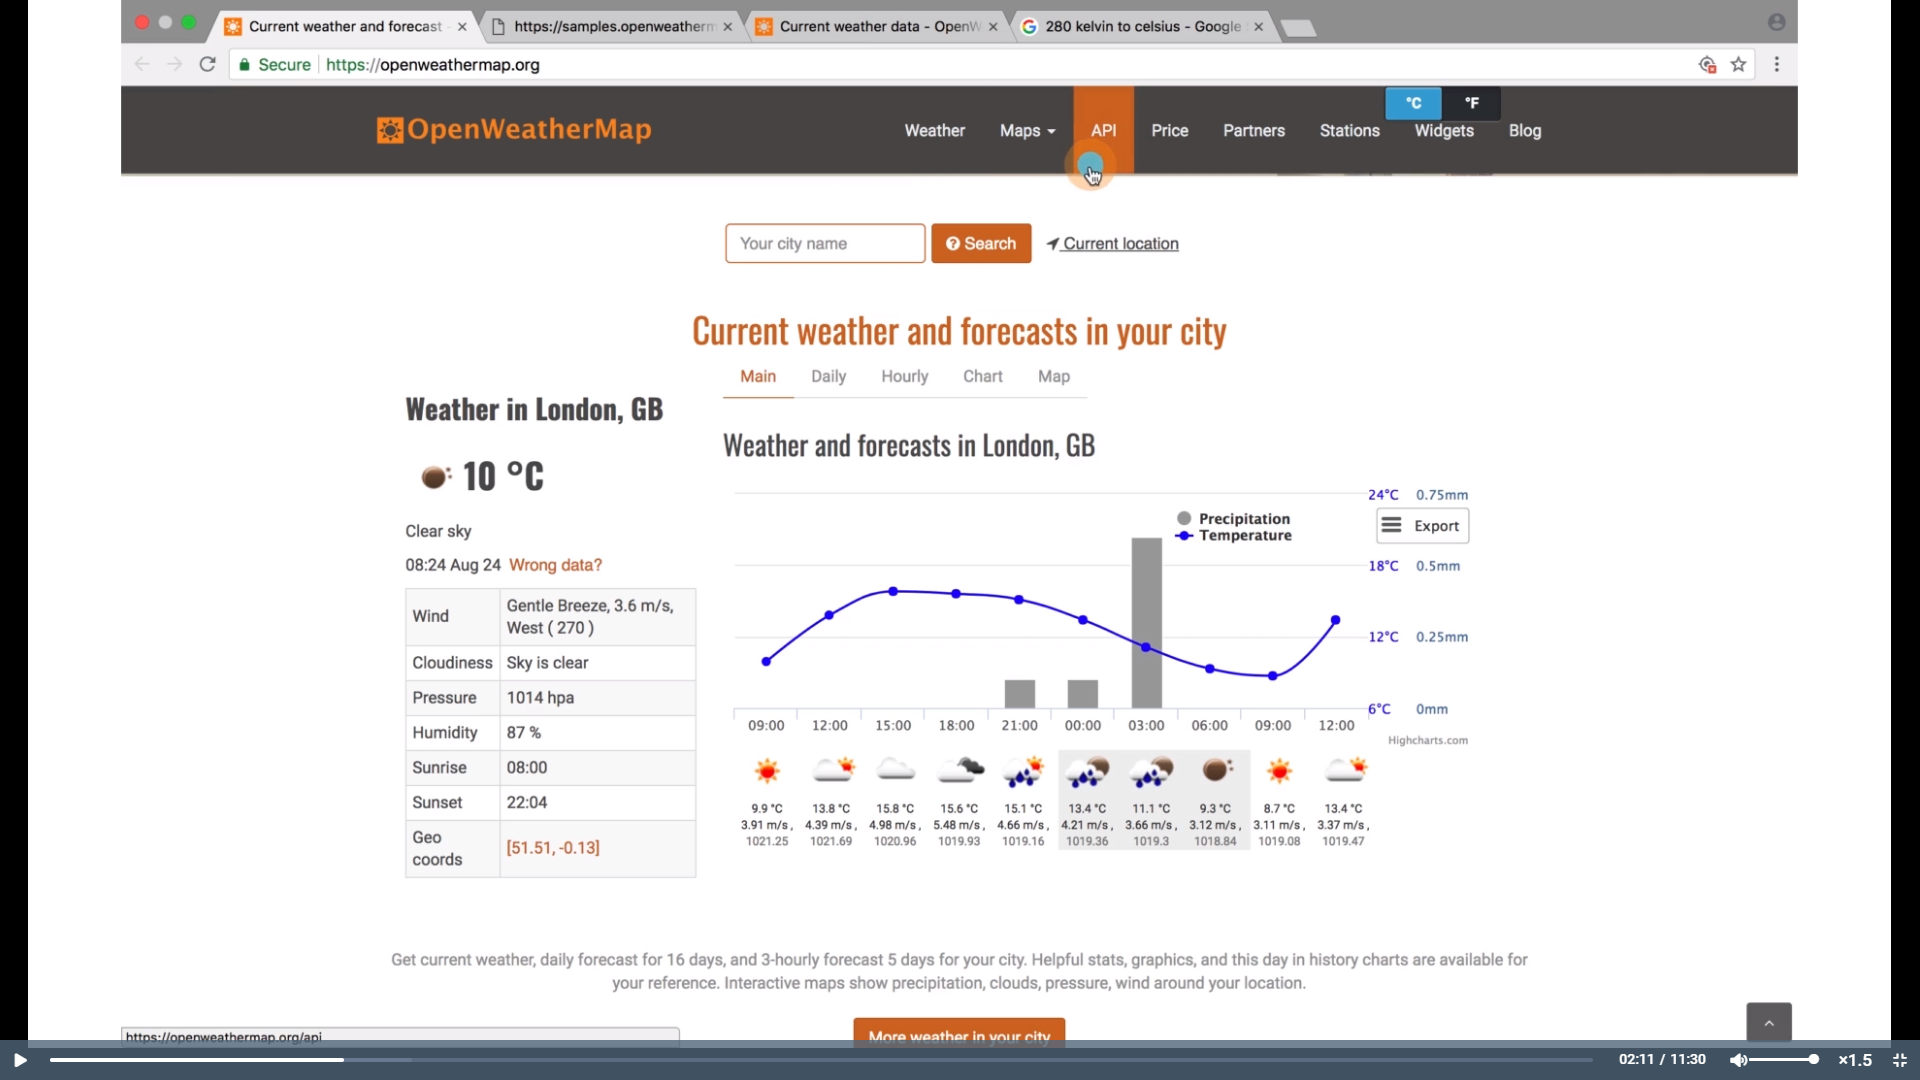

Если выбрать кнопку API, то получим инструкцию по получению погоды без необходимости использования регулярок:
    
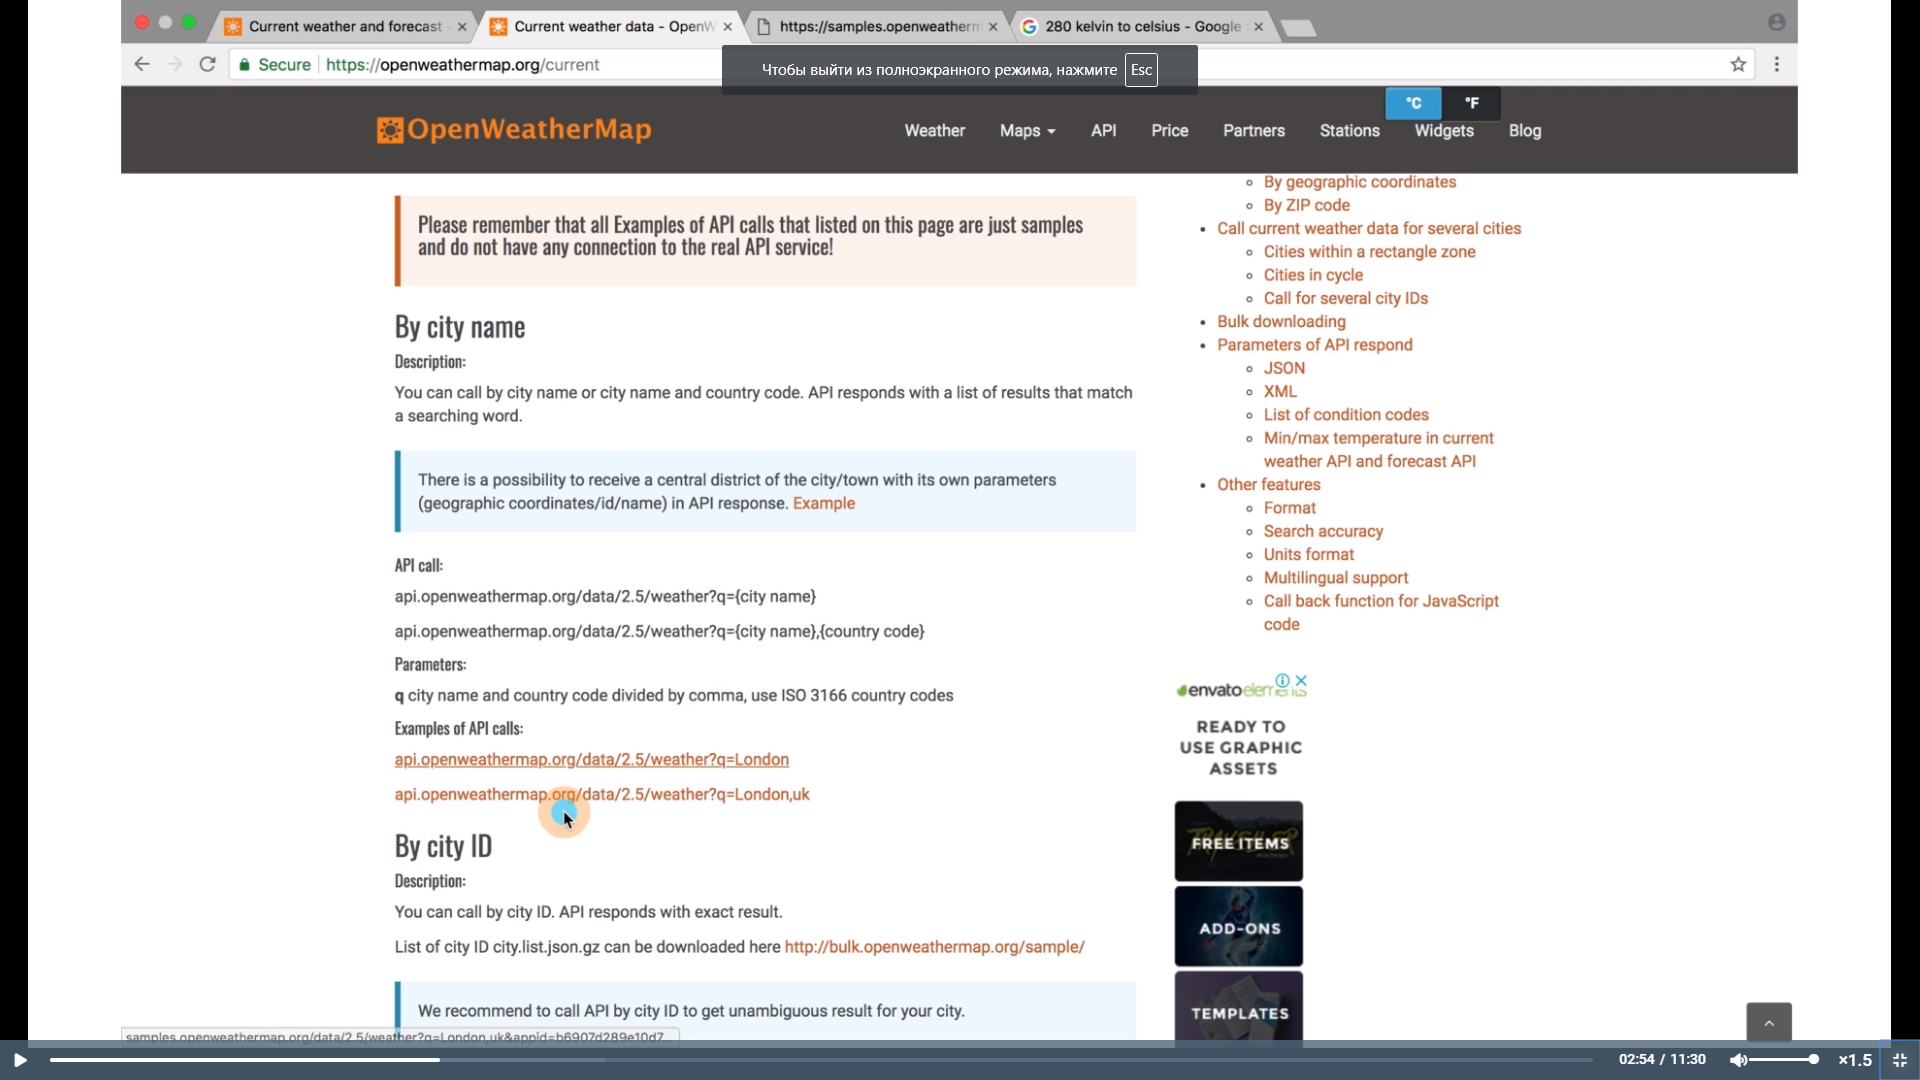

Внизу мы видим образцы прямых альтернативных ссылок на получение нужных нам данных (api.openwethermap.org/data/2.5/weather?q=London,uk). Если по ней перейти - мы получим всю необходимую информацию. при копировании добавится идентификатор пользователя:

In [80]:
link = 'http://samples.openweathermap.org/data/2.5/weather?q=London,uk&appid=b6907d289e10d714a6e88b30761fae22'
resp = requests.get(link)
resp.text

'{"coord":{"lon":-0.13,"lat":51.51},"weather":[{"id":300,"main":"Drizzle","description":"light intensity drizzle","icon":"09d"}],"base":"stations","main":{"temp":280.32,"pressure":1012,"humidity":81,"temp_min":279.15,"temp_max":281.15},"visibility":10000,"wind":{"speed":4.1,"deg":80},"clouds":{"all":90},"dt":1485789600,"sys":{"type":1,"id":5091,"message":0.0103,"country":"GB","sunrise":1485762037,"sunset":1485794875},"id":2643743,"name":"London","cod":200}'

Такая информация в виде текста нам не очень интересна, используем её как библиотеку:

In [81]:
import json
data = json.loads(resp.text)
data

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 300,
   'main': 'Drizzle',
   'description': 'light intensity drizzle',
   'icon': '09d'}],
 'base': 'stations',
 'main': {'temp': 280.32,
  'pressure': 1012,
  'humidity': 81,
  'temp_min': 279.15,
  'temp_max': 281.15},
 'visibility': 10000,
 'wind': {'speed': 4.1, 'deg': 80},
 'clouds': {'all': 90},
 'dt': 1485789600,
 'sys': {'type': 1,
  'id': 5091,
  'message': 0.0103,
  'country': 'GB',
  'sunrise': 1485762037,
  'sunset': 1485794875},
 'id': 2643743,
 'name': 'London',
 'cod': 200}

Отличается не сильно, но так как мы не видим ошибок, значит, парсинг прошел успешно. Теперь получим наконец погоду:

In [83]:
temp = data['main']['temp']
temp

280.32

Жарковато. Но температура на сайте указана в кельвинах. Переведем температуру в градусы Цельсия:

In [88]:
temp = ((data['main']['temp'])*100 - 27315)/100
temp

7.17

Подробнее с существующими API - ссылками можно ознакомиться на сайте https://programmableweb.com

### Часть 3. Запуск с локального сервера

Рецепт сервера на Python:

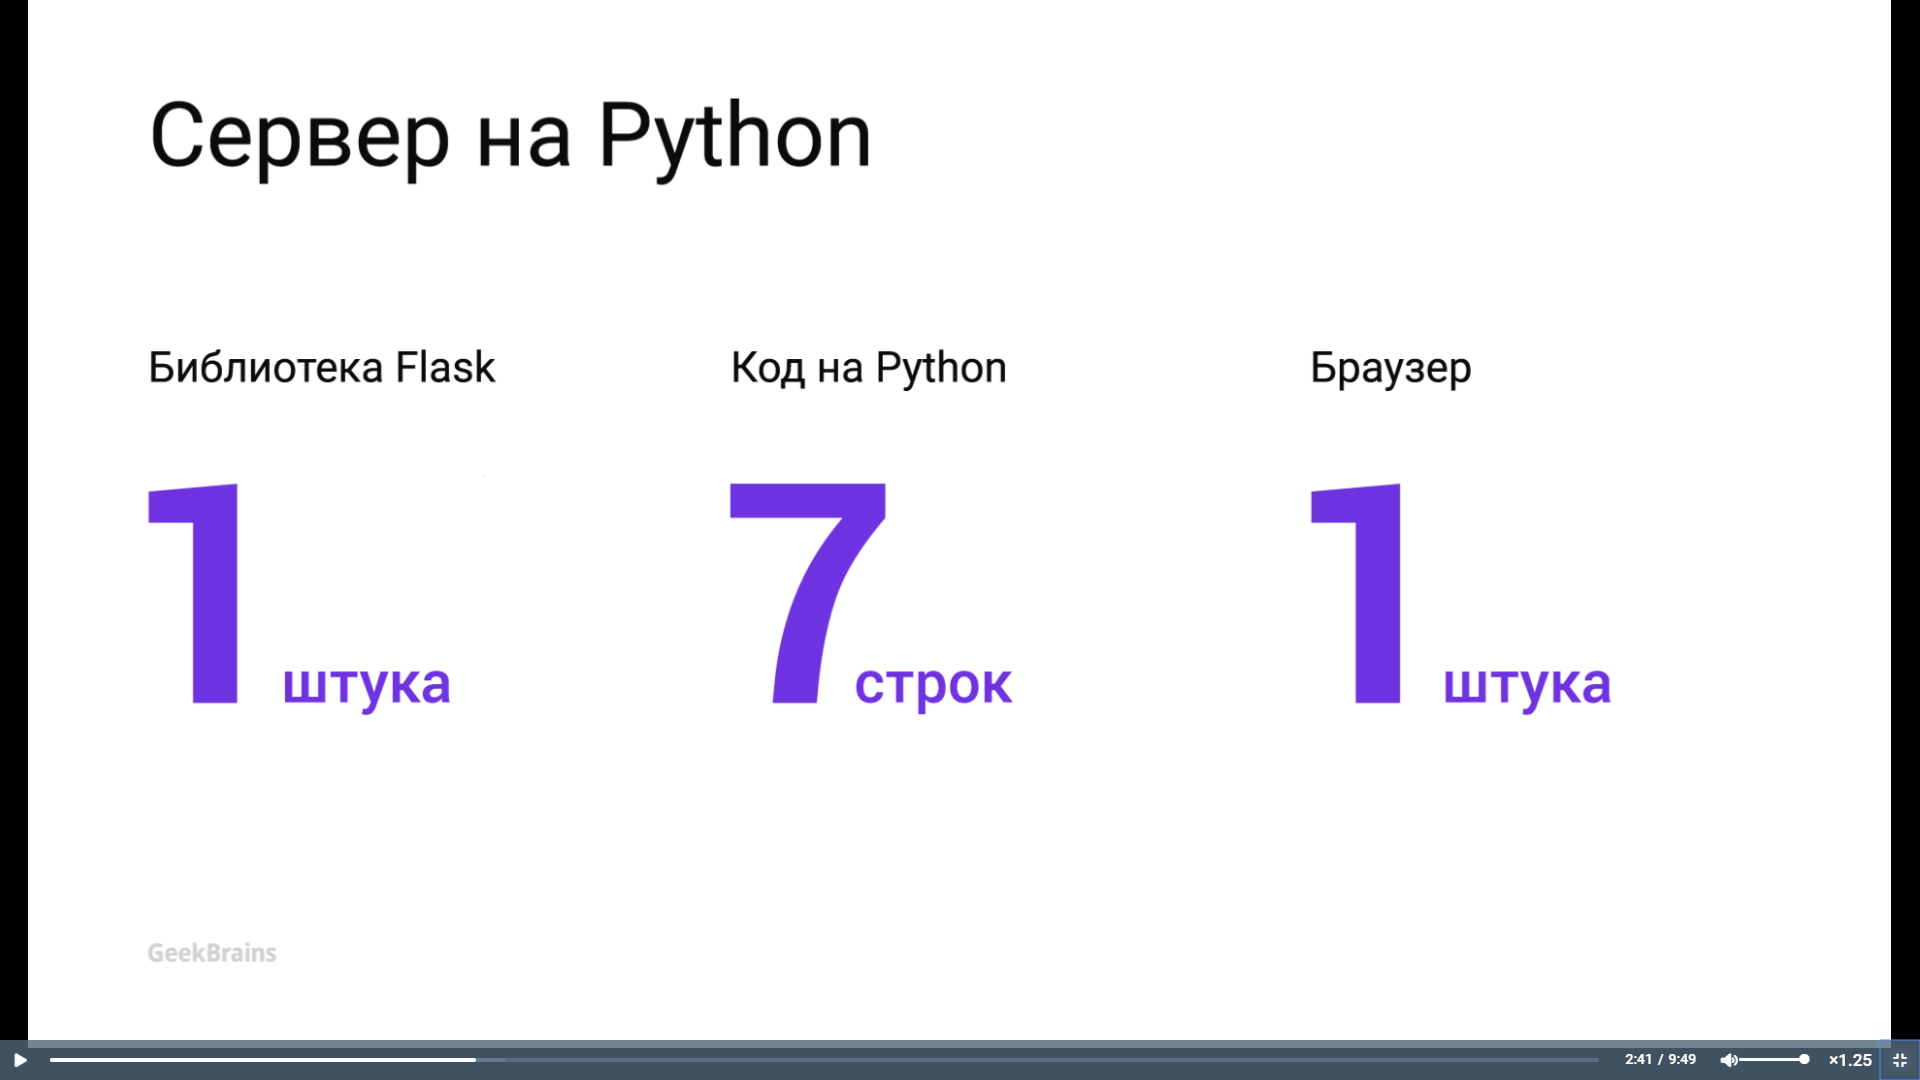

Итак, сздаем сервер:

In [3]:
#импортируем элемент библиотеки:
from flask import Flask

# создаем свой объект:
app = Flask(__name__)

# добавляем пути к начальной странице (адрес начальной страницы"/"):
@app.route("/")

# Создаем функцию для генерации странички:
def index():
    return "Привет! Ты добрался"

# Запускаем сайт, если заявленная страничка главная:
if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Apr/2019 22:10:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Apr/2019 22:10:10] "GET /favicon.ico HTTP/1.1" 404 -


Получили сервер по адресу http://127.0.0.1:5000/. Если заменить ip-адрес на localhost:5000, то результат будет тем же. Также в этом окошке видим журнал событий сервера. Теперь спарсим его:

In [6]:
import requests

print(requests.get('http://127.0.0.1:5000/').text)

Привет! Ты добрался


### часть 4. Аргументы web-запросов.

Теперь будем взламывать сервер. Для этого мы написали код: 

In [13]:
from flask import Flask, render_template, request

app = Flask(__name__)

@app.route("/")

def index():

    return render_template('index.html')

@app.route("/secret_page")

def secret_page():

    with open('key.txt', encoding="utf-8") as f:
    
        correct_key = f.read()

    if request.args.get('key') == correct_key:
    
        return render_template("secret_page.html")
        
    else:
    
        return "Incorrect key!"

if __name__ == '__main__':

    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[2019-04-18 22:31:20,400] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\User\Anaconda3\lib\site-packages\flask\app.py", line 2292, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\User\Anaconda3\lib\site-packages\flask\app.py", line 1815, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\User\Anaconda3\lib\site-packages\flask\app.py", line 1718, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\User\Anaconda3\lib\site-packages\flask\_compat.py", line 35, in reraise
    raise value
  File "C:\Users\User\Anaconda3\lib\site-packages\flask\app.py", line 1813, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\User\Anaconda3\lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-13-fbc9c41c71

и две страницы: 
index.html

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Login page</title>
    <style>
        body {
            font-family: "Open Sans", sans-serif;
        }
        section {
            max-width: 50px;
            margin: 0 auto;
        }
    </style>
</head>
<body>
    <section>
        <h1>Please login to enter secret data!</h1>
        <form action="/secret_page">
            <input type="password" name="key" placeholder="Число от 70 до 90">
            <button>Submit</button>
        </form>
    </section>
</body>
</html>



 И secret_page.html: 


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>SECRET</title>
    <style>
        body {
            font-family: "Open Sans", sans-serif;
        }
        section {
            max-width: 500px;
            margin: 0 auto;
        }
    </style>
</head>
<body>
    <section>
        <h2>Your Pentagon access key: "iAmThEbE3TrUssIaNhAcKeReVeR"</h2>
    </section>
</body>
</html>

### <i> важно! 
    
<i> 1. нужно создать txt с правильным паролем в корне. 

<i> 2. страницы должны храниться в папке /tempalets иначе сервер их не найдет! 

запрос правильного пароля проходит по ссылке http://127.0.0.1:5000/secret?key=73, где 73  - отправленный нами пароль.Соответственно, нам нужно ввести код, который будет "ломать". Автоматизируем процесс запроса:

In [ ]:
import requests
from time import sleep

link = 'http://127.0.0.1:5000/secret_page?key='

for n in range(70,90):
    request_link = link + str(n)
    resp = requests.get(request_link).text
    print(resp)

    if resp == 'Incorrect key!':
        print(f"the key {n} is incorrect")
        sleep(1) # для задержки запросов
    else:
        print(f"FOUND: {str(n)}")
        break

### часть 5. Web Requests

Теперь поработаем с сайтом aviasales. Для этого скопируем линк для получения запроса цен. До этого, в документации сайта мы получили инструкции как сформулировать запрос. Итак:

In [3]:
import requests
import json

link = 'http://min-prices.aviasales.ru/calendar_preload?origin=MOW&destination=NCE'

data = json.loads(requests.get(link).text)
print(data)

{'errors': {}, 'current_depart_date_prices': [{'value': 27658.0, 'trip_class': 0, 'show_to_affiliates': False, 'return_date': '2019-05-01', 'origin': 'MOW', 'number_of_changes': 1, 'gate': 'AMADEUS', 'found_at': '2019-04-18T15:49:38.577637', 'distance': 2539, 'destination': 'NCE', 'depart_date': '2019-04-18', 'actual': True}, {'value': 27658.0, 'trip_class': 0, 'show_to_affiliates': False, 'return_date': '2019-05-02', 'origin': 'MOW', 'number_of_changes': 1, 'gate': 'AMADEUS', 'found_at': '2019-04-18T15:49:38.577637', 'distance': 2539, 'destination': 'NCE', 'depart_date': '2019-04-18', 'actual': True}, {'value': 25344.0, 'trip_class': 0, 'show_to_affiliates': False, 'return_date': '2019-05-05', 'origin': 'MOW', 'number_of_changes': 1, 'gate': 'SuperSaver.ru', 'found_at': '2019-04-17T11:44:11', 'distance': 2539, 'destination': 'NCE', 'depart_date': '2019-04-18', 'actual': True}, {'value': 19538.0, 'trip_class': 0, 'show_to_affiliates': False, 'return_date': '2019-06-07', 'origin': 'MOW'

Теперь выведем только целевой показатель:

In [4]:
print(data['best_prices'][0])

{'value': 11733.0, 'trip_class': 0, 'show_to_affiliates': False, 'return_date': '2019-10-09', 'origin': 'MOW', 'number_of_changes': 1, 'gate': 'KLM/AirFrance', 'found_at': '2019-04-17T06:58:33', 'distance': 2539, 'destination': 'NCE', 'depart_date': '2019-10-04', 'actual': True}


Сделаем для удобства функцию:


In [29]:
def best_price(a,b):
    link = f'http://min-prices.aviasales.ru/calendar_preload?origin={a}&destination={b}'
    data = json.loads(requests.get(link).text)
    answ = data['best_prices'][0]
    return answ

best_price('MOW', 'NCE')

{'value': 11849.0,
 'trip_class': 0,
 'show_to_affiliates': False,
 'return_date': '2019-08-22',
 'origin': 'MOW',
 'number_of_changes': 1,
 'gate': 'Trip.ru',
 'found_at': '2019-04-19T04:38:06',
 'distance': 2539,
 'destination': 'NCE',
 'depart_date': '2019-08-17',
 'actual': True}

Итак, мы нашли самый дешевый билет. теперь найдем цену для Санкт-Петербурга:

In [25]:
best_price('LED', 'NCE')

{'value': 15303.0,
 'trip_class': 0,
 'show_to_affiliates': False,
 'return_date': '2019-05-21',
 'origin': 'LED',
 'number_of_changes': 1,
 'gate': 'OneTwoTrip',
 'found_at': '2019-04-14T07:47:10',
 'distance': 2386,
 'destination': 'NCE',
 'depart_date': '2019-05-13',
 'actual': True}

Теперь поищем билеты в одну сторону вставив аргумент one_way=true после знака ? и разделив его с последующим кодом операндом (&) :

In [28]:
def best_price(a,b,c):
    link = f'http://min-prices.aviasales.ru/calendar_preload?{c}&origin={a}&destination={b}'
    data = json.loads(requests.get(link).text)
    answ = data['best_prices'][0]
    return answ

best_price('MOW', 'NCE', 'one_way=true')

{'value': 7959.0,
 'trip_class': 0,
 'show_to_affiliates': False,
 'return_date': None,
 'origin': 'MOW',
 'number_of_changes': 1,
 'gate': 'Trip.ru',
 'found_at': '2019-04-18T16:09:33',
 'distance': 2539,
 'destination': 'NCE',
 'depart_date': '2019-07-20',
 'actual': True}

Воспользовавшись <a href="https://support.travelpayouts.com/hc/ru/articles/360002322572-API-%D0%B0%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%BC%D0%BF%D0%BB%D0%B8%D1%82%D0%B0-%D0%B4%D0%BB%D1%8F-%D1%81%D1%82%D1%80%D0%B0%D0%BD-%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2-%D0%B8-%D0%B0%D1%8D%D1%80%D0%BE%D0%BF%D0%BE%D1%80%D1%82%D0%BE%D0%B2">документацией</a>  написал функцию возвращает IATA код города:

In [31]:
def return_IATA(a):
    link = f'http://autocomplete.travelpayouts.com/places2?term={a}&locale=ru&types[city]=country'
    data = json.loads(requests.get(link).text)
    return data[3]['city_code']

## Урок 4. Практикум: веб и словари

### часть 1. Парсинг html-страницы с  в wiki

В этой части мы будем отрабатывать пройденное.  Начнем с парсинга Wikipedia. Составим программу - аналог поисковика. Она будет получать запрос и искать наиболее часто встречаемые слова, характерные для запрошенного. Для начала сделаем функцию для создания ссылки:

In [33]:
def get_link(topic):
    link = 'https://ru.m.wikipedia.org/wiki/' + topic.capitalize()
    return link

get_link('дерево')

'https://ru.m.wikipedia.org/wiki/Дерево'

Теперь сделаем функцию для получения данных по топику:

In [56]:
from requests import get

def get_topic_page(topic):
    link = get_link(topic)
    html_content = get(link).text
    with open('parced_pages/new.html', 'w', encoding='utf-8') as f:
        f.write(html_content)
    return True

In [58]:
print(get_topic_page('дерево'))

True


Страница сохранилась по указанному адресу: parced_pages/new.html


### часть 2. Обработка html. Получение текста статьи.

Вынесем функции в отдельный файл wiki_requests.py и импортируем запросы из файла:

In [59]:
from wiki_requests import get_topic_page

In [60]:
get_topic_page('Россия')

True

Исправим функцию так, чтобы нам возвращался контент, а не сохранялась страница:

In [81]:
def get_topic_page(topic):
    link = get_link(topic)
    html_content = get(link).text
    #with open('parced_pages/new.html', 'w', encoding='utf-8') as f:
    #    f.write(html_content)
    return html_content

Теперь сделаем функцию, возвращающую текст, а не html. Программа будет выполнять это при помощи регулярных выражений: 

In [103]:
def get_topic_text(topic):
    html_content = get_topic_page(topic)
    words = re.findall("[а-яА-Я\-\']+", html_content)
    text = ' '.join(words)
    return text

In [ ]:
Теперь посмотрим длинну и содержание результата:

In [106]:
spam = get_topic_text('Россия')
print(len(spam))
print(spam[10000:11000])

269794
бщество международным сообществом как Правопреемство государств государство-продолжатель Союз Советских Социалистических Республик СССР - - в вопросах ядерного потенциала внешнего долга государственной собственности за рубежом а также членства в Совет Безопасности ООН Совете Безопасности Организация Объедин нных Наций ООН - - Россия состоит в ряде международных организаций Организация Объедин нных Наций ООН Организация по безопасности и сотрудничеству в Европе ОБСЕ Совет Европы Совете Европы Евразийский экономический союз ЕАЭС Содружество Независимых Государств СНГ Организация черноморского экономического сотрудничества ОЧЭС Организация Договора о коллективной безопасности ОДКБ Гаагская конференция по международному частному праву ГКМЧП Всемирная организация интеллектуальной собственности ВОИС Международная морская организация ММО Всемирная торговая организация ВТО Всемирная туристская организация ЮНВТО Всемирная федерация профсоюзов ВФП Шанхайская организация сотрудничества ШОС

Теперь получим функцию для работы со словами:

In [111]:
def get_topic_words(topic):
    html_content = get_topic_page(topic)
    words = re.findall("[а-яА-Я\-\']+", html_content)
    return words

### часть 3. 

используем функцию, чтобы получить словарь слов о россии:

In [128]:
words = get_topic_words('Россия')
print(len(words))
print(words[1500]) 
print(words[1975])
print(words[1230])

42058
'
-е
жителей


Как видим, есть много мусора, поэтому дополним нашу функцию фильтром слов из 3 и более букв {3,}:

In [131]:
def get_topic_words(topic):
    html_content = get_topic_page(topic)
    words = re.findall("[а-яА-Я\-\']{3,}", html_content)
    return words

In [133]:
words = get_topic_words('Россия')
print(len(words))
print(words[1800:2000]) 

26827
['чехлом', 'Сибирской', 'платформы', 'связаны', 'крупнейшие', 'залежи', 'каменного', 'угля', 'каменных', 'калийных', 'солей', 'нефти', 'газа', 'трапповыми', 'интрузиями', 'медно-никелевые', 'месторождения', 'Норильск', 'Норильска', 'Кимберлитовая', 'трубка', 'кимберлитовой', 'трубкой', 'Алмаз', 'алмазы', 'Увеличить', 'Тайга', 'Красноярский', 'край', 'Красноярском', 'крае', 'строении', 'Урало-Монгольского', 'эпипалеозойского', 'складчатого', 'пояса', 'разделяющего', 'древние', 'платформы', 'выделяются', 'области', 'Рифей', 'геохронологический', 'период', 'рифейской', 'Байкальская', 'складчатость', 'байкальской', 'салаирской', 'Каледонская', 'складчатость', 'каледонской', 'Герцинская', 'складчатость', 'герцинской', 'складчатости', 'Енисей-Саяно-Байкальская', 'область', 'рифейской', 'байкальской', 'складчатости', 'обрамляет', 'Сибирскую', 'платформу', 'Вдоль', 'границы', 'Восточно-Европейской', 'платформой', 'располагается', 'Предуральский', 'краевой', 'прогиб', 'заполненный', 'перм

Теперь получим рейтинг самых популярных слов:

In [134]:
def get_common_words(topic):
    word_list = get_topic_words(topic)
    rate = {}
    for word in word_list:
        if word in rate:
            rate[word] += 1
        else:
            rate[word] = 1
    return rate

In [135]:
rate = get_common_words('россия')
print(len(rate))
print(rate['Россия'])
print(rate['Москва'])

10255
145
59


Теперь дополним функцию, чтобы получить рейтинг:

In [144]:
def get_common_words(topic):
    word_list = get_topic_words(topic)
    rate = {}
    for word in word_list:
        if word in rate:
            rate[word] += 1
        else:
            rate[word] = 1
    rate_list = list(rate.items())
    rate_list.sort(key = lambda x: x[1])
    return rate_list

Получаем топ-5:

In [145]:
rate = get_common_words('Россия')
rate[(len(rate)-5):len(rate)]

[('году', 145),
 ('Федерации', 193),
 ('Российской', 204),
 ('года', 204),
 ('России', 560)]

Неудобно. Для того, чтобы последовательность сортировки была обратная, поставим - перед x[1]:

In [146]:
def get_common_words(topic):
    word_list = get_topic_words(topic)
    rate = {}
    for word in word_list:
        if word in rate:
            rate[word] += 1
        else:
            rate[word] = 1
    rate_list = list(rate.items())
    rate_list.sort(key = lambda x: -x[1])
    return rate_list

In [148]:
rate = get_common_words('Россия')
rate[:5]

[('России', 560),
 ('Российской', 204),
 ('года', 204),
 ('Федерации', 193),
 ('Россия', 145)]

Теперь сделаем визуализацию:

In [152]:
def visualize_comon_words(topic,first_position, last_position):
    first_position -= 1  # Смещаем каретку  
    words = get_common_words(topic)
    for w in words[first_position:last_position]:
        print(w[0])

In [154]:
visualize_comon_words('Россия', 1, 5)

России
Российской
года
Федерации
Россия


Теперь делаем фунцию, объединяющую всё в один кейс:

In [157]:
def main():
    topic = input('Topic: ')
    first_position = int(input('first position of rating: '))
    last_position = int(input('last position of rating: '))
    visualize_comon_words(topic,first_position, last_position)

In [158]:
main()

Topic: Дерево
first position of rating: 1
last position of rating: 5
или
деревья
деревьев
Дерево
Латинский


## Урок 5. Основы ООП

### Часть 1 Методы объектов.

Проходить тему будем на примере птиц. Создадим класс птиц. 

In [1]:
class Bird:
    name = 'Unknown'

Теперь внесём первую птичку - сову:

In [2]:
owl = Bird()

Теперь у нас появился объект (переменная) сова. Дадим сове имя: 

In [7]:
owl.name

'Unknown'

Получили общее имя, присвоенное для всего класса. Теперь присвоим сове новое имя:

In [8]:
owl.name = 'OWL!'

Создадим новый объект - орла:

In [9]:
eagle = Bird()

Проверим имена объектов: 

In [10]:
print(owl.name, eagle.name)

OWL! Unknown


Вс верно, мы не присвоили имя орлу. Не смотря на то, что объекты одного класса, свойства у них отличаются. Теперь давайте птичкам дадим голос - возможность произносить свое имя. Это назвается метод, задается он при помощи функции в описании класса:

In [13]:
class Bird:
    name = 'Unknown'
    def call(self):
        print("Here will my name")
        
owl = Bird()
owl.name = 'Owl!'

eagle = Bird()
eagle.name = 'Eagle!'


In [14]:
owl.call()

Here will my name


Метод вывел заданную строку. Это, конечно не имя, но уже кое-что. Итак, нужно вернуть при вызове функции имя. Для этого нужно понять, что такое self. Self подает то, что хранится в переменной "объект". То есть все свойства, присвоенные объекту, возвращаются в функцию. Соответственно, мы можем использовать все свойства объекта ("совы" или "орла"):

In [16]:
class Bird:
    name = 'Unknown'
    def call(self):
        this_name = self.name
        print(f"My name is {this_name}")
        
owl = Bird()
owl.name = 'Owl!'

eagle = Bird()
eagle.name = 'Eagle!'

eagle.call()
owl.call()

My name is Eagle!
My name is Owl!


### Часть 2. Свойства объекта

И так давайте научим объекты хранить местоположение. Для этого научим объект хранить и пользоваться свойствами скорость и дистанция. Для начала внедрим дистанцию:

In [20]:
class Bird:
    name = 'Unknown'
    distance = 0 #NEW
    
    def call(self):
        this_name = self.name
        print(f"My name is {this_name}")
        
owl = Bird()
owl.name = 'Owl!'

owl.distance

0

Теперь передвинем сову на 100 метров:

In [21]:
owl.distance += 100
owl.distance

100

Попробуем автоматизировать выдачу. Для этого дополним класс новой функцией:

In [22]:
class Bird:
    name = 'Unknown'
    distance = 0 #NEW
    
    def call(self):
        this_name = self.name
        print(f"My name is {this_name}")
        
    def run(self):
        self.distance += 100 # == self.distance = self.distance + 100
        
owl = Bird()
owl.name = 'Owl!'

print(owl.distance)
owl.run()
print(owl.distance)

0
100


Теперь сделаем так, чтобы самостоятельно решать, какое расстояние пролетела птица. для этого вносим новый аргумент

In [23]:
class Bird:
    name = 'Unknown'
    distance = 0 #NEW
    
    def call(self):
        this_name = self.name
        print(f"My name is {this_name}")
        
    def run(self, distance):
        self.distance += distance
        
owl = Bird()
owl.name = 'Owl!'

print(owl.distance)
owl.run(300)
print(owl.distance)

0
300


Теперь сделаем значение по умолчанию для пролёта совы. То есть если мы явно не зададим значение дистанции, то сова пролетит то расстояние, которое мы задали.

In [30]:
class Bird:
    name = 'Unknown'
    distance = 0 
    speed = 0 #NEW!!!
    
    def call(self):
        this_name = self.name
        print(f"My name is {this_name}")
        
    def run(self, distance = False):
        if not distance:  #NEW!!, == if distance = False:  
            distance = self.speed 
        self.distance += distance
        
owl = Bird()
owl.name = 'Owl!'
owl.speed = 150

Теперь пустим сову полетать:

In [31]:
owl.run()
print(owl.distance)
owl.run(300)
print(owl.distance)

150
450


Теперь пустим орла полетать:

In [32]:
eagle = Bird()
eagle.name = 'Eagle!'
eagle.speed = 400

eagle.run()
print(eagle.distance)
eagle.run(300)
print(eagle.distance)

400
700


### Часть 3. Конструктор класса.

Теперь облегчим настройку объекта при помощи конструктора чтобы облегчить код:
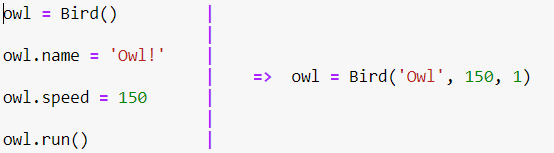


Сначала уберем имя и скорость. Для этого будем использовать метод __init__:

In [1]:
class Bird:
    name = 'Unknown'
    distance = 0 
    speed = 0 
    
    def call(self):
        this_name = self.name
        print(f"My name is {this_name}")
        
    def run(self, distance = False):
        if not distance:    
            distance = self.speed 
        self.distance += distance
    
    def __init__(self, name, speed, steps):  #NEW!!
        self.name = name
        self.speed = speed
        for n in range(steps):
            self.run()
            
owl = Bird("OWL", 150, 1)
eagle = Bird("Eagle", 300, 1)

owl.run()
print(owl.distance)
eagle.run()
print(eagle.distance)

300
600


Стоит обратить внимание, что этот метод __init__ в коде мы нигде дополнительно не вызывали.

## Урок 6

### часть 1. Наследование.

Дополним птичник 2 новыми классами - курица 1 и курица 2. Предполагаем, что они очень похожы. Для оптимизации создадим новый класс курица, в составе которого будут курицы 1 и 2:

In [8]:
class Chicken(Bird):
    type = 'chiken'
    
    def __init__(self, steps):
        self.name = 'Chiсken'
        self.speed = 50
        for n in range(steps):
            self.run()

chiсken_1 = Chicken(10)
chiсken_2 = Chicken(20)
print(chiсken_1.name, chiсken_1.distance)
print(chiсken_1.name, chiсken_2.distance)
chiсken_1.run()
print(chiсken_1.distance)

Chiсken 500
Chiсken 1000
550


Таким образом, получилось 2 наследника класса chicken. 

### часть 2. Приватные методы. Инкапсуляция

Теперь сделаем так, чтобы скорость курицы была не линейной, а постепенно ускорялась. Для этого изменим класс Птицы:

In [1]:
class Bird:
    name = 'Unknown'
    distance = 0 
    speed = 0 
    step = 1 # NEW!
    
    def call(self):
        this_name = self.name
        print(f"My name is {this_name}")
        
    def run(self, distance = False):
        if not distance:    
            distance = self.speed  
        self.distance += distance + distance*(1 + self.step/10) #NEW!
        self.step += 1 #NEW!
    
    def __init__(self, name, speed, steps):  #NEW!!
        self.name = name
        self.speed = speed
        for n in range(steps):
            self.run()
            
owl = Bird("OWL", 150, 3)
eagle = Bird("Eagle", 300, 1)




In [2]:
class Chicken(Bird):
    type = 'chiken'
    
    def __init__(self, steps):
        self.name = 'Chiсken'
        self.speed = 50
        for n in range(steps):
            self.run()

In [3]:
chiсken_1 = Chicken(10)
chiсken_2 = Chicken(20)

In [8]:
print('birds before run:')
print(chiсken_1.name, '1', chiсken_1.distance)
print(chiсken_2.name, '2', chiсken_2.distance)
print(owl.name, owl.distance)
print(eagle.name, eagle.distance)

chiсken_1.run(20)
chiсken_2.run(100)
owl.run()
eagle.run()

print('')
print('birds after run:')
print(chiсken_1.name, '1', chiсken_1.distance)
print(chiсken_2.name, '2', chiсken_2.distance)
print(owl.name, owl.distance)
print(eagle.name, eagle.distance)

birds before run:
Chiсken 1 56210.0
Chiсken 2 133500.0
OWL 220500.0
Eagle 585000.0

birds after run:
Chiсken 1 57210.0
Chiсken 2 165500.0
OWL 261000.0
Eagle 729000.0


Мы видим, что расстояния увеличились, а таке видим, что из-за деления числа преобразовались во float. Для возвращения в int нужно в строке 14 это явно указать: self.distance += distance + int(distance*(1 + self.step/10))

Теперь мы закроем от других пользователей возможность изменения переменной step. есть 2 уровня инкапсуляции: 

1. поставить нижнее подчеркивание: _step 

Такой способ не блокирует саму возможность менять переменную.

2. Поставить двойное нижнее подчеркивание: __step 

Такой способ блокирует саму возможность изменять внутреннюю переменную.

### Часть 3. Полиморфизм

Метод с одинаковым названием у разных классов дает разные результаты. Используем для примера полиморфизм комманды print():

In [12]:
class A:
    def __init__(self, v1, v2):
        self.field1 = v1
        self.field2 = v2
        
a = A(10, 20)
print(a)

Как результат мы получили вывод какого-то объекта. Теперь дополним методом __str__:

In [26]:
class A:
    def __init__(self, v1, v2):
        self.field1 = v1
        self.field2 = v2
    def __str__(self):
        return f'{self.field1} + {self.field2} = {str(self.field1 + self.field2)}'
        
a = A(10, 20)
print(a)

10 + 20 = 30


Теперь вывод поменялся. Это и есть полиморфизм.

### Часть 4. Магические методы.

Итак, у нас есть два объекта класса А:

In [3]:
class A:
    def __init__(self, v1):
        self.field = v1
    def __str__(self):
        return str(self.field)
        
item1 = A(20)
item2 = A(24)
item3 = A(10000)

 Мы хотим сравнить их. Можно это сделать следующим способом:

In [8]:
def foo(i1, i2):
    return i1.field > i2.field

In [9]:
foo(item1, item2)

False

Это работает, но не совсем удобно. Правильней было бы оформить это в виде метода из класса, где помимо себя, принимается другой объект:

In [16]:
class A:
    def __init__(self, v1):
        self.field = v1
    
    def __str__(self):
        return str(self.field)
    
    #NEW!!
    def foo (self, other):
        return self.field > other.field
        
item1 = A(20)
item2 = A(12)
item3 = A(10000)

In [17]:
item1.foo(item2)

True

Уже лучше, но не идеал. Хотелось бы что-нибудь получить что-то типа print(item1 > item2). Если мы просто введем такой запрос, то получится ошибка:

In [18]:
print(item1 > item2)

TypeError: '>' not supported between instances of 'A' and 'A'

 Для этого используем магический метод:

In [19]:
class A:
    def __init__(self, v1):
        self.field = v1
    
    def __str__(self):
        return str(self.field)
    
    #NEW!!
    # метод, объясняющий поведение объекта, когда объект меньше
    def __gt__ (self, other): 
        return self.field > other.field
    
    #NEW!!
    # отвечает за то, как объект ведёт себя, когда объект меньше
    def __lt__ (self, other): 
        return self.field < other.field
        
item1 = A(20)
item2 = A(12)
item3 = A(10000)

In [21]:
print(item1 > item2)
print(item1 < item2)

True
False


Полный список магических методов можно найти в статье <a href="https://habr.com/ru/post/186608/">Руководство по магическим методам в Питоне</a>

## Урок 7. Прктика

### практика 1

Сделаем игру по уничтожению хомяков.

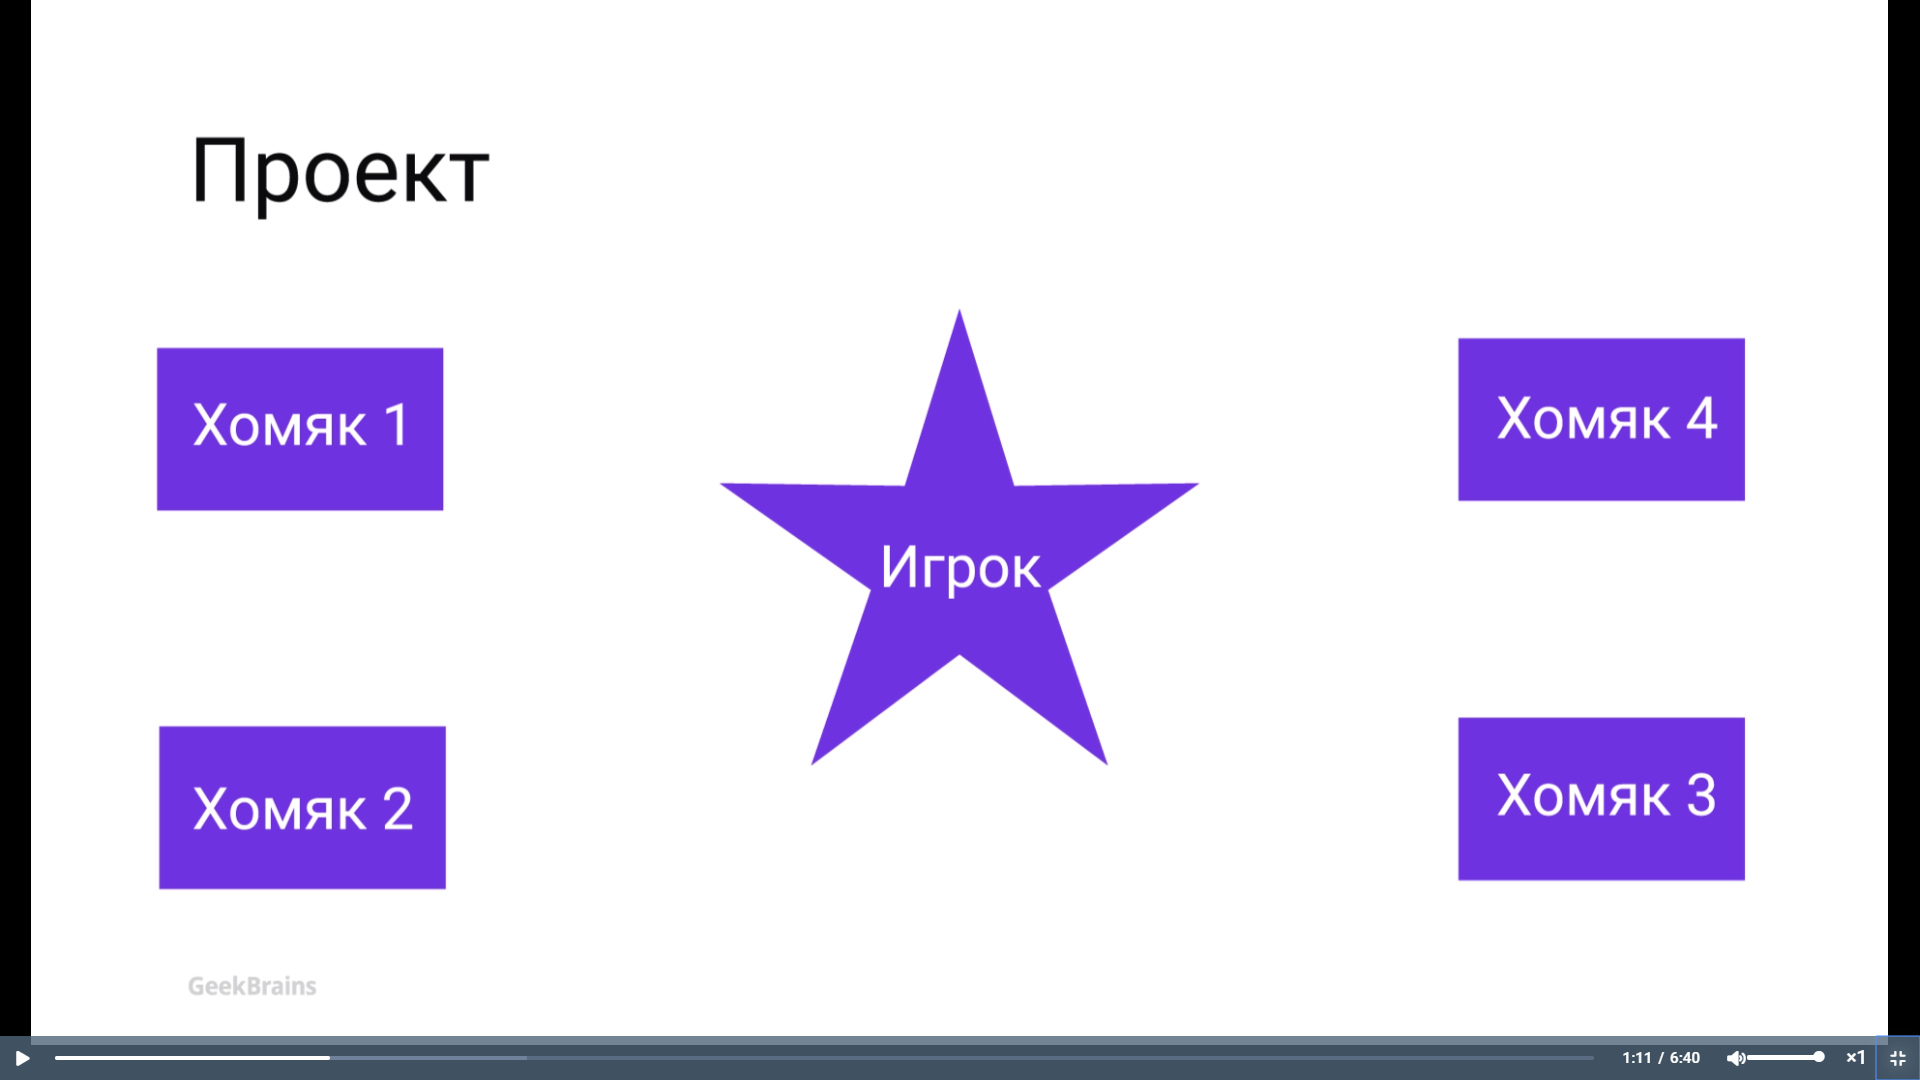

Параметры героя: <br> 
    1 сила <br>
    2 скорость перемещения <br>
    3 Кол-во здоровья <br>
<br>
Параметры хомяка: <br>
    1 сила <br>
    2 скорость перемещения <br>
    3 запас прочности 

Создадим три класса: Game, Hamster, Player. Начнём с игрока:

In [5]:
class Player:
    health = 100
    default_damage = 10
    position = [0, 0]

### практика 2

Создадим класс Game:

In [6]:
class Game:
    def __init__(self):
        self.player = Player()
    
    def render_map(self):
        s = '''****\n****'''
        li = s.split ('\n')
        row = li[self.player.position[1]]
        row = row[:self.player.position[0]] + 'x' + row[self.player.position[0]+1:]
        li[self.player.position[1]] = row
        s = '\n'.join(li)
        print(s)

game = Game()
game.render_map()

x***
****


Все получилось - теперь на карте игры отображается местополоение игрока. Теперь научим его двигаться:

In [7]:
class Game:
    def __init__(self):
        self.player = Player()
    
    def render_map(self):
        s = '''****\n****'''
        li = s.split ('\n')
        row = li[self.player.position[1]]
        row = row[:self.player.position[0]] + 'x' + row[self.player.position[0]+1:]
        li[self.player.position[1]] = row
        s = '\n'.join(li)
        print(s)
    
    def move_player(self, destination):
        ''' destination = w,a,s,d'''
        if destination =='s':
            self.player.position[1] += 1

game = Game()
game.render_map()

x***
****


In [8]:
game.move_player('s')
game.render_map()

****
x***


### Практика 3

Теперь сделаем интерактивный ввод команд на движение. Оптимизируем код:<br>
- Введем глобальную переменную map<br>
- Вынесем отдельно отрисовку элемента на карте<br>
- Напишем код для движения игрока, оговорив условие при выходе за территорию карты<br>

In [9]:
class Game:
    map = '''****\n****'''
    
    def __init__(self):
        self.player = Player()
    
    def add_point(self, position, name, s):
        li = s.split ('\n')
        row = li[position[1]]
        row = row[:position[0]] + name + row[position[0]+1:]
        li[position[1]] = row
        return '\n'.join(li)
        
    
    def render_map(self):
        s = self.map
        s = self.add_point(self.player.position, 'x', s)
        print(s)
    
    def move_player(self, destination):
        ''' destination = w,a,s,d'''
        if destination =='s':
            if self.player.position[1] == len(self.map.split('\n')) - 1:
                return False
            self.player.position[1] += 1
            
        if destination =='w':
            if self.player.position[1] == 0:
                return False
            self.player.position[1] -= 1
            
        if destination =='a':
            if self.player.position[0] == 0:
                return False
            self.player.position[0] -= 1
            
        if destination =='d':
            if self.player.position[1] == len(self.map.split('\n')[0]) - 1:
                return False
            self.player.position[0] += 1
    def start(self):
        while True:
            command = input('Insert command: ')
            if command in ['w', 'a', 's', 'd']:
                self.move_player(command)
                self.render_map()
            elif  command  == 'q':
                break


In [ ]:
game = Game()
game.render_map()
game.start()

### Часть 4. Делаем хомяков.

In [1]:
from random import randint

class Hamster:
    position = [0,0]
    health = 3
    
    def __init__(self, random_width, map_height):
        self.health = randomint(1,4)
        self.position = [randomint(0, map_width), randomint(0, map_height)]

При этом мы никак не оговорили, что хомяки не могут возникать на одной и той же клетке поля. Теперь импортируем хоямяков:

In [5]:
# NEW!!! Число хомяков в игре
hamsters_count = 4 

class Game:
    map = '''****\n****\n****\n****'''
    
    def __init__(self):
        self.player = Player()
        # NEW!!!
        self.hamsters = Hamster(len(self.map.split('\n')[0], len(self.map.split('\n')[1])) for i in range(hamsters_count)  
    
    def add_point(self, position, name, s):
        li = s.split ('\n')
        row = li[position[1]]
        row = row[:position[0]] + name + row[position[0]+1:]
        li[position[1]] = row
        return '\n'.join(li)
        
    
    def render_map(self):
        s = self.map
        s = self.add_point(self.player.position, 'x', s)
        # NEW! Генерируем хомяков на карте:
        for h in self.hamsters:
            self.add_point(h.position, 'h', s)
        print(s)
    
    def move_player(self, destination):
        ''' destination = w,a,s,d'''
        if destination =='s':
            if self.player.position[1] == len(self.map.split('\n')) - 1:
                return False
            self.player.position[1] += 1
            
        if destination =='w':
            if self.player.position[1] == 0:
                return False
            self.player.position[1] -= 1
            
        if destination =='a':
            if self.player.position[0] == 0:
                return False
            self.player.position[0] -= 1
            
        if destination =='d':
            if self.player.position[1] == len(self.map.split('\n')[0]) - 1:
                return False
            self.player.position[0] += 1
    def start(self):
        while True:
            command = input('Insert command: ')
            if command in ['w', 'a', 's', 'd']:
                self.move_player(command)
                self.render_map()
            elif  command  == 'q':
                break


SyntaxError: invalid syntax (<ipython-input-5-2c9b04e5a182>, line 12)